In [443]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM , Dense,Bidirectional,Dropout
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from keras.regularizers import l1_l2,l1,l2
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import matplotlib.pyplot as mp
import seaborn as sn
import warnings as w
w.filterwarnings('ignore')

In [444]:
df=pd.read_csv("tesla_stock_data_2000_2025.csv")

In [445]:
df.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
1,Date,NaN,NaN,NaN,NaN,NaN
2,2010-06-29,1.5926669836044312,1.6666669845581055,1.1693329811096191,1.2666670083999634,281494500
3,2010-06-30,1.5886670351028442,2.0280001163482666,1.553333044052124,1.7193330526351929,257806500
4,2010-07-01,1.4639999866485596,1.7280000448226929,1.3513330221176147,1.6666669845581055,123282000


In [446]:
df=df.drop([0,1])

In [447]:
df.head()

,Price,Close,High,Low,Open,Volume
2,2010-06-29,1.5926669836044312,1.6666669845581055,1.1693329811096191,1.2666670083999634,281494500
3,2010-06-30,1.5886670351028442,2.0280001163482666,1.553333044052124,1.7193330526351929,257806500
4,2010-07-01,1.4639999866485596,1.7280000448226929,1.3513330221176147,1.6666669845581055,123282000
5,2010-07-02,1.2799999713897705,1.5399999618530273,1.24733304977417,1.5333329439163208,77097000
6,2010-07-06,1.0740000009536743,1.3333330154418945,1.0553330183029175,1.3333330154418945,103003500


In [448]:
df.rename(columns={'Price':'Date'},inplace=True)


In [449]:
df.reset_index(drop=True,inplace=True)

In [450]:
df.head(3)

,Date,Close,High,Low,Open,Volume
0,2010-06-29,1.5926669836044312,1.6666669845581055,1.1693329811096191,1.2666670083999634,281494500
1,2010-06-30,1.5886670351028442,2.0280001163482666,1.553333044052124,1.7193330526351929,257806500
2,2010-07-01,1.4639999866485596,1.7280000448226929,1.3513330221176147,1.6666669845581055,123282000


In [451]:
df.shape

(3692, 6)

In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3692 entries, 0 to 3691
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3692 non-null   object
 1   Close   3692 non-null   object
 2   High    3692 non-null   object
 3   Low     3692 non-null   object
 4   Open    3692 non-null   object
 5   Volume  3692 non-null   object
dtypes: object(6)
memory usage: 173.2+ KB


In [453]:
numeric_cols=["Open","High","Low","Close","Volume"]
for col in numeric_cols:
    df[col]=pd.to_numeric(df[col],errors='coerce')


In [454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3692 entries, 0 to 3691
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3692 non-null   object 
 1   Close   3692 non-null   float64
 2   High    3692 non-null   float64
 3   Low     3692 non-null   float64
 4   Open    3692 non-null   float64
 5   Volume  3692 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 173.2+ KB


In [455]:
df['Date']=pd.to_datetime(df['Date'])
df.dropna(inplace=True)

In [456]:
df.set_index('Date',inplace=True)

In [457]:
df['Close_Lag1']=df['Close'].shift(1)
df['Close_lag3']=df['Close'].shift(3)


In [458]:
df['Rolling_Mean_7']=df['Close'].rolling(window=7).mean()
df['Rolling_std_7']=df['Close'].rolling(window=7).std()
df["Rolling_Mean_30"]=df["Close"].rolling(window=30).mean()

In [459]:
df["Momentum"]=df["Close"]-df["Close"].shift(3)

In [460]:
df["Day"]=df.index.day
df["Month"]=df.index.month
df["Weekday"]=df.index.dayofweek

In [461]:
df.dropna(inplace=True)

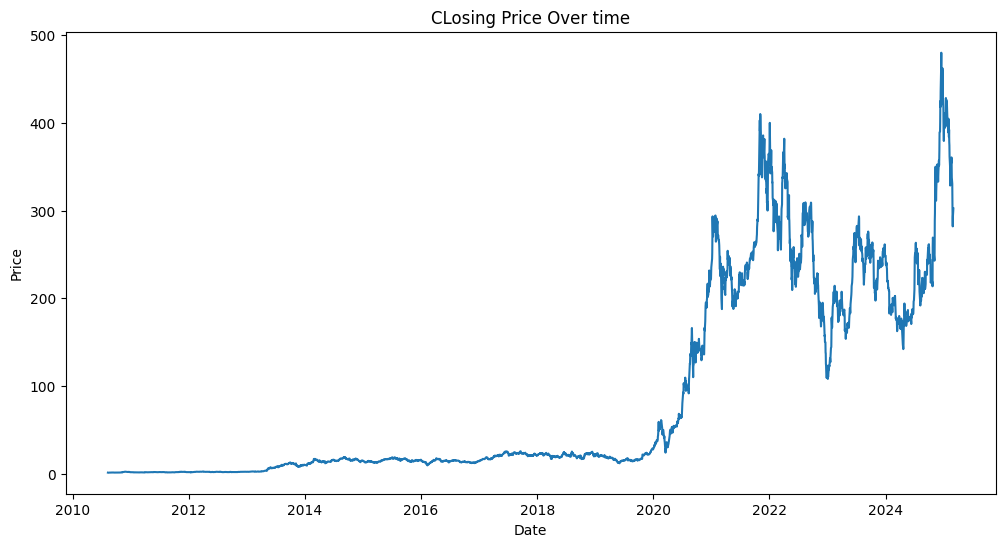

In [462]:
mp.figure(figsize=(12,6))
mp.plot(df["Close"])
mp.title("CLosing Price Over time")
mp.xlabel("Date")
mp.ylabel("Price")
mp.show()

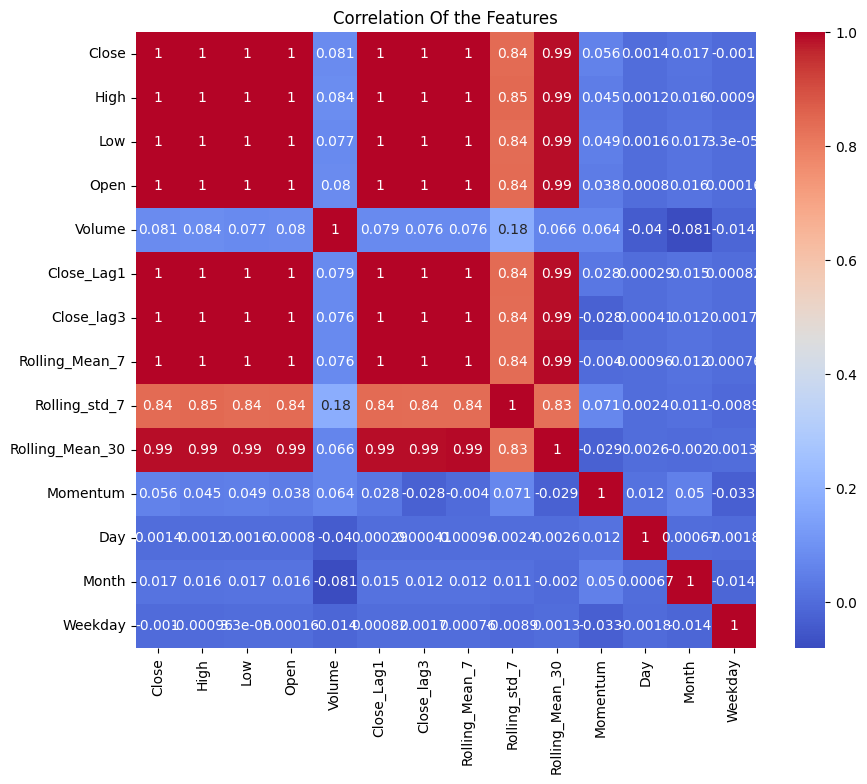

In [463]:
mp.figure(figsize=(10,8))
sn.heatmap(df.corr(),annot=True,cmap="coolwarm")
mp.title("Correlation Of the Features")
mp.show()

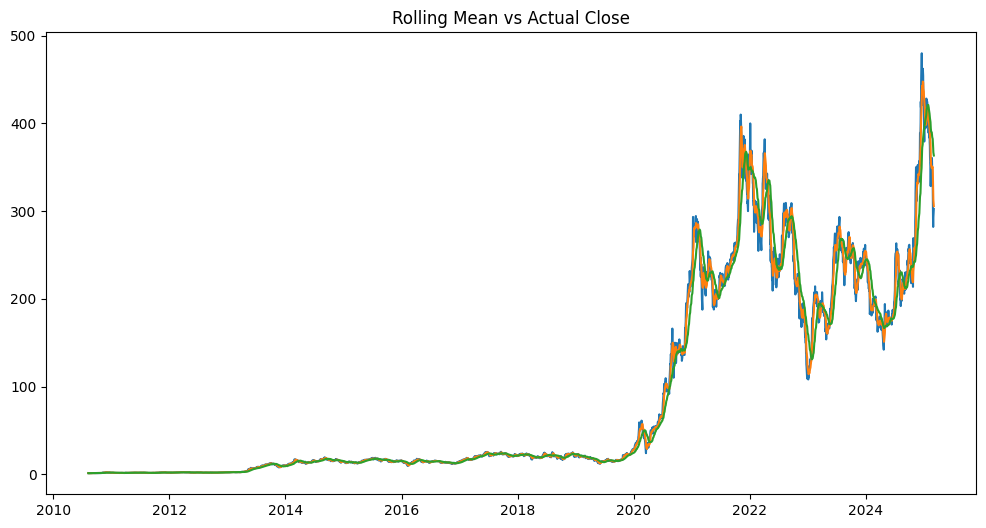

In [464]:
mp.figure(figsize=(12,6))
mp.plot(df["Close"],label='Actual Close')
mp.plot(df["Rolling_Mean_7"],label="Rolling Mean 7")
mp.plot(df["Rolling_Mean_30"],label="Rolling Mean 30")  
mp.title("Rolling Mean vs Actual Close")
mp.show()

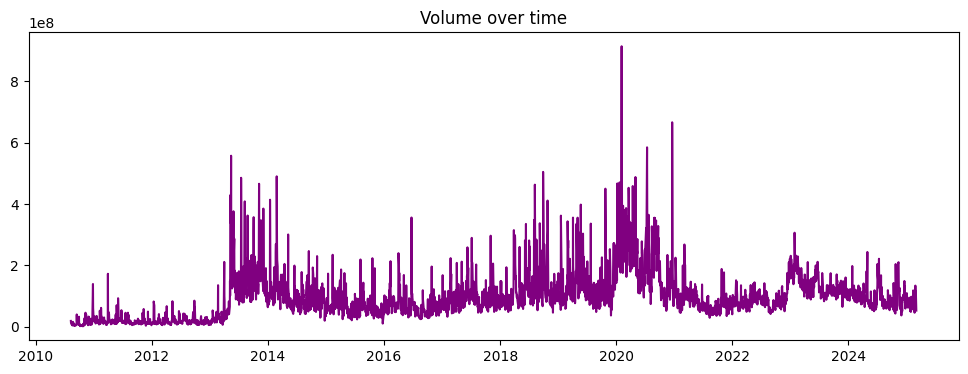

In [465]:
mp.figure(figsize=(12,4))
mp.plot(df["Volume"],color="purple")
mp.title("Volume over time")
mp.show()

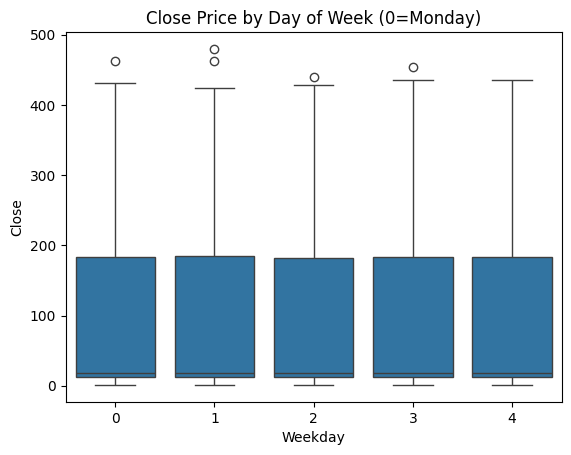

In [466]:
sn.boxplot(x=df['Weekday'],y=df['Close'])
mp.title("Close Price by Day of Week (0=Monday)")
mp.show()

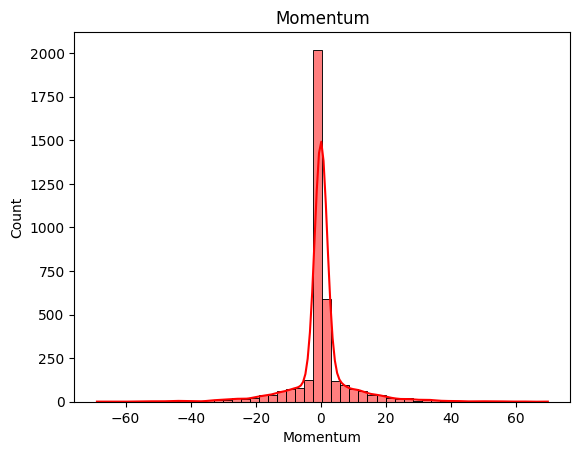

In [467]:
sn.histplot(df['Momentum'],bins=50,kde=True,color='red')
mp.title("Momentum")
mp.show()

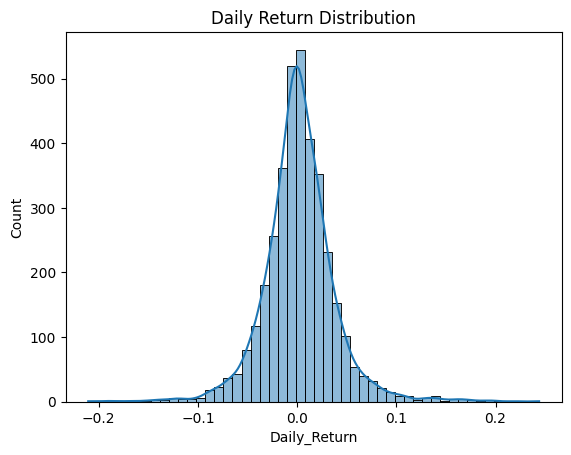

In [468]:
df["Daily_Return"]=df["Close"].pct_change()
sn.histplot(df['Daily_Return'].dropna(),bins=50,kde=True)
mp.title("Daily Return Distribution")
mp.show()

In [469]:
df=df.dropna()

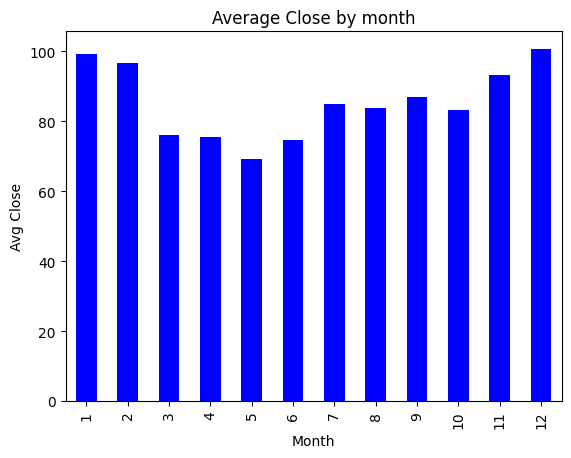

In [470]:
monthly_avg=df.groupby(df.index.month)["Close"].mean()
monthly_avg.plot(kind='bar',color='blue')
mp.title("Average Close by month")
mp.xlabel("Month")

mp.ylabel("Avg Close")
mp.show()

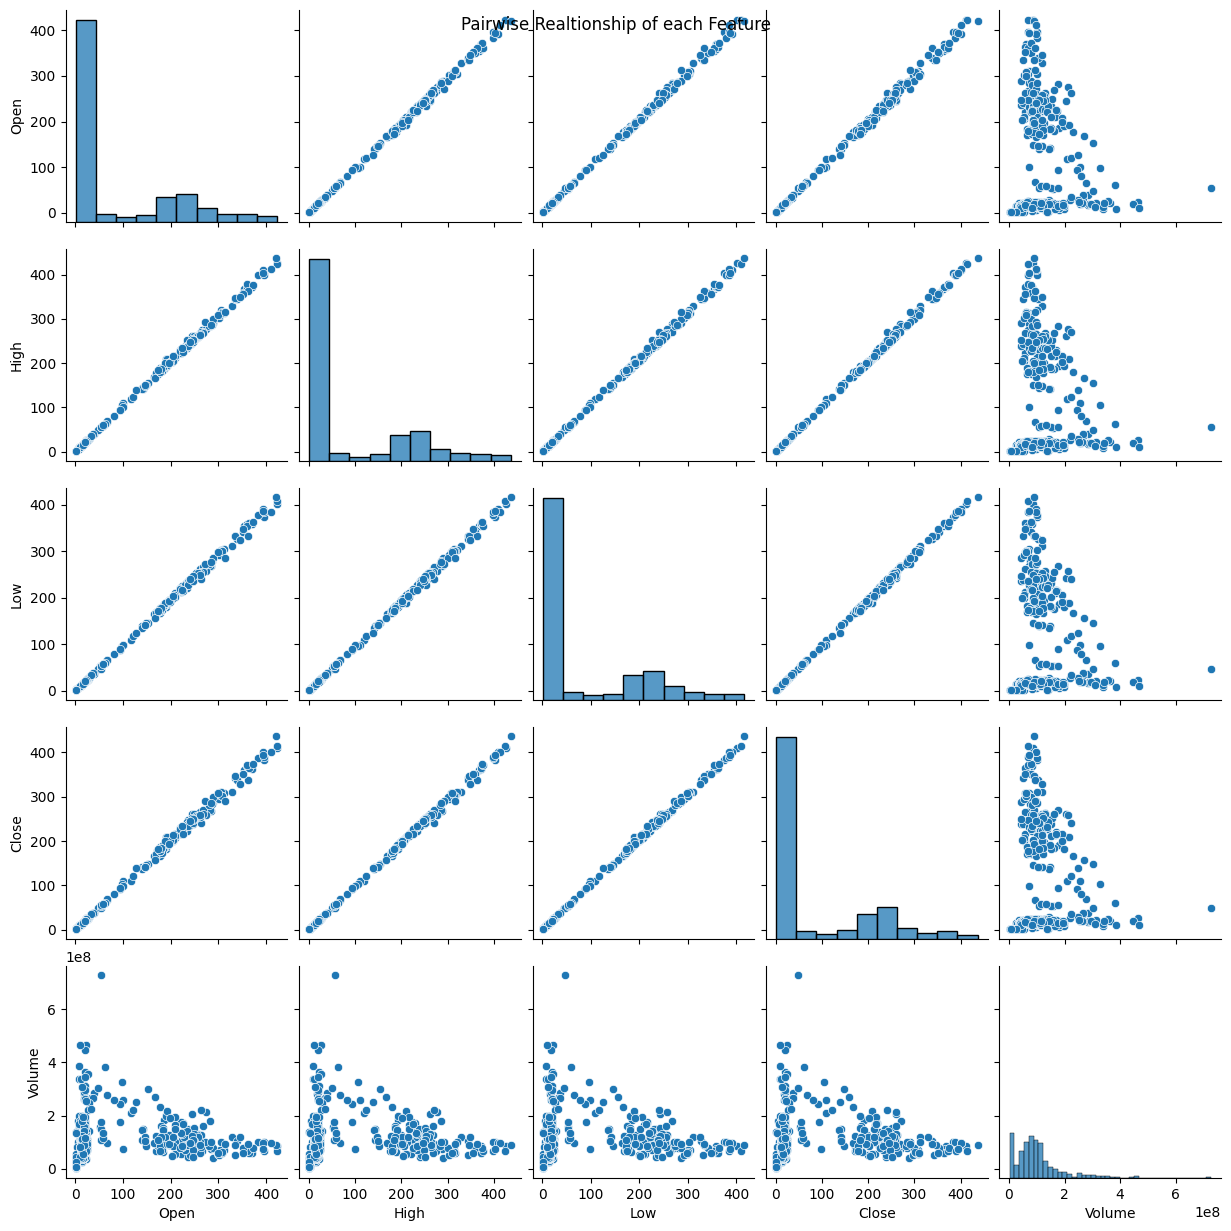

In [471]:
sample=df[["Open","High","Low","Close","Volume"]].sample(500)
sn.pairplot(sample)
mp.suptitle("Pairwise Realtionship of each Feature")
mp.show()

In [472]:
df.head(3)

,Close,High,Low,Open,Volume,Close_Lag1,Close_lag3,Rolling_Mean_7,Rolling_std_7,Rolling_Mean_30,Momentum,Day,Month,Weekday,Daily_Return
Date,,,,,,,,,,,,,,,
2010-08-11,1.193333,1.258667,1.190000,1.246000,11964000,1.268667,1.306000,1.331238,0.091347,1.322778,-0.112667,11,8,2,-0.059380
2010-08-12,1.173333,1.193333,1.159333,1.186667,10365000,1.193333,1.306667,1.289809,0.087117,1.308933,-0.133334,12,8,3,-0.016760
2010-08-13,1.221333,1.230000,1.177333,1.212000,9510000,1.173333,1.268667,1.261809,0.068889,1.300844,-0.047334,13,8,4,0.040909


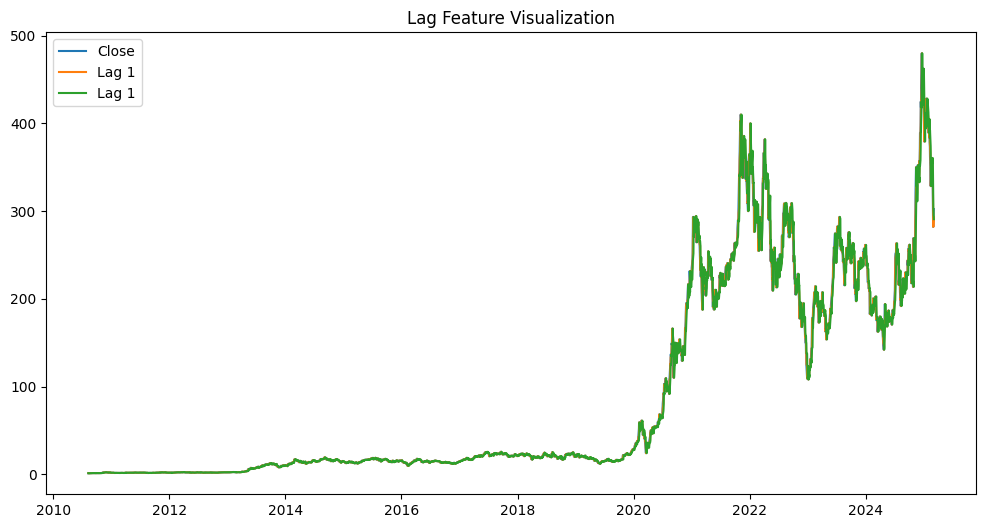

In [473]:
mp.figure(figsize=(12,6))
mp.plot(df["Close"],label="Close")
mp.plot(df["Close_Lag1"],label="Lag 1")
mp.plot(df["Close_lag3"],label="Lag 1")
mp.legend()
mp.title("Lag Feature Visualization")
mp.show()

In [474]:
x=df.drop('Close',axis=1)
y=df[["Close"]]

In [475]:
x_scaler=MinMaxScaler()
y_scaler=MinMaxScaler()
x_scaled=x_scaler.fit_transform(x)
y_scaled=y_scaler.fit_transform(y)

In [476]:
def creating_multivariate_sequences(x,y,seq_length):
    x_seq,y_seq=[],[]
    for i in range(seq_length,len(x)):
        x_seq.append(x[i-seq_length:i])
        y_seq.append(y[i])
    return np.array(x_seq),np.array(y_seq)

In [477]:
seq_len=60
x_seq,y_seq=creating_multivariate_sequences(x_scaled,y_scaled,seq_len)

In [478]:
x_train,x_test,y_train,y_test=train_test_split(x_seq,y_seq,test_size=0.2,shuffle=False)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(2881, 60, 14) (721, 60, 14) (2881, 1) (721, 1)


In [479]:
regularizer=l1_l2(l1=1e-5,l2=1e-4)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=3,min_lr=1e-6,verbose=1)
early_stop=EarlyStopping(monitor='val_loss',patience=7,restore_best_weights=True,verbose=1)

In [480]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, kernel_regularizer=regularizer, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')


In [481]:
history=model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test),callbacks=[reduce_lr,early_stop])

Epoch 1/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0126 - val_loss: 0.0076 - learning_rate: 0.0010
Epoch 2/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0048 - val_loss: 0.0052 - learning_rate: 0.0010
Epoch 3/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0036 - val_loss: 0.0063 - learning_rate: 0.0010
Epoch 4/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0032 - val_loss: 0.0036 - learning_rate: 0.0010
Epoch 5/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0024 - val_loss: 0.0141 - learning_rate: 0.0010
Epoch 6/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0042 - val_loss: 0.0032 - learning_rate: 0.0010
Epoch 7/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0019 - val_loss: 0.0026 - learning_rate: 0.0010
Epoch 8/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0019 - val_loss: 0.0027 - learning_rate: 0.0010
Epoch 9/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0015 - val_loss: 0.0023 - learning_rate: 0.0010
Epoch 10/30
91/91 ━

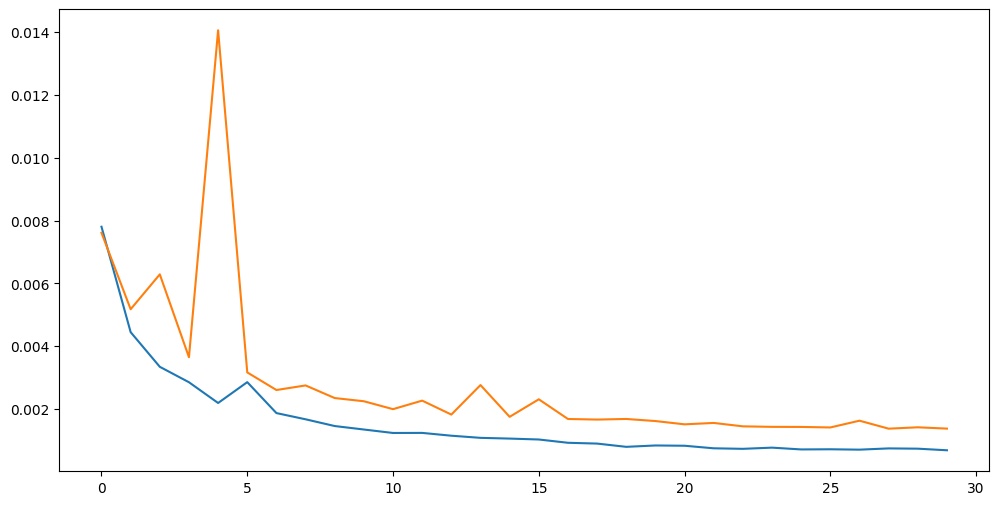

In [482]:
mp.figure(figsize=(12,6))
mp.plot(history.history['loss'],label="Training Loss")
mp.plot(history.history['val_loss'],label="Validation Loss")
mp.show()

In [483]:
y_pred=model.predict(x_test)
y_pred_inv=y_scaler.inverse_transform(y_pred)
y_test_inv=y_scaler.inverse_transform(y_test)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [484]:
mse=mean_squared_error(y_test_inv,y_pred_inv)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test_inv,y_pred_inv)
r2=r2_score(y_test_inv,y_pred_inv)

In [485]:
print(f"mse: {mse}->rmse: {rmse}->mae: {mae}->r2: {r2}")

mse: 222.56422095873938->rmse: 14.918586426291848->mae: 11.12138212206625->r2: 0.9478751145730455


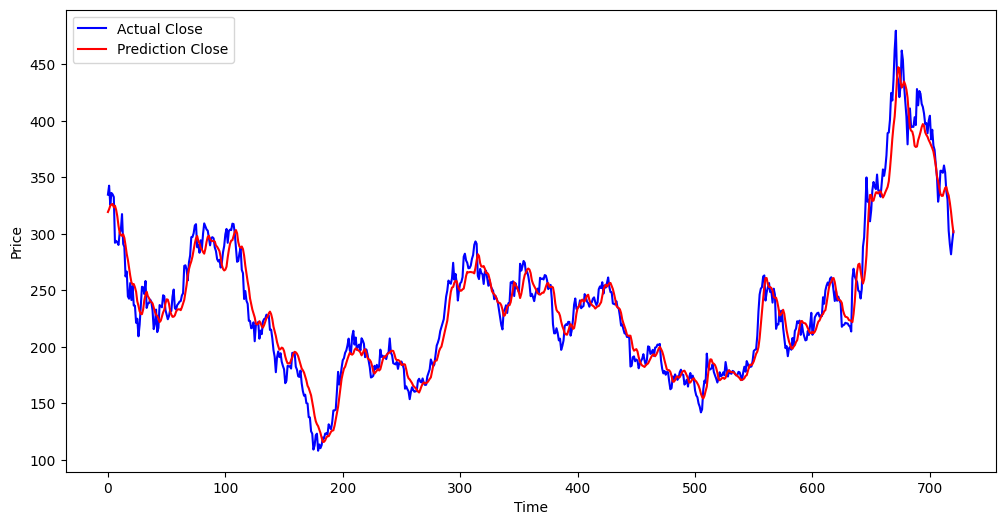

In [486]:
mp.figure(figsize=(12,6))
mp.plot(y_test_inv,label="Actual Close",color="blue")
mp.plot(y_pred_inv,label="Prediction Close",color="red")
mp.xlabel("Time")
mp.ylabel("Price")
mp.legend()
mp.show()